# Credit Card Analysis and Prediction

Dataset obtained on Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans

from sklearn.manifold import Isomap
from sklearn import preprocessing
from sklearn import manifold

import scipy.io
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import math, random

#### Read the data

In [6]:
df = pd.read_csv('cc.csv')
df = df.drop('CUST_ID', axis = 1) 
df.fillna(method ='ffill', inplace = True) 
print(f'Dataset shape: {df.shape}')
df.head(10)


Dataset shape: (8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


#### Standadize, scale and normalize the data

In [13]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### PCA

In [14]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

print(f'Shape of pca: {X_principal.shape}')
X_principal.head(5)

Shape of pca: (8950, 2)


,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330633,0.268879
3,-0.481656,-0.097610
4,-0.563512,-0.482506


Visualize the PCA data

No handles with labels found to put in legend.


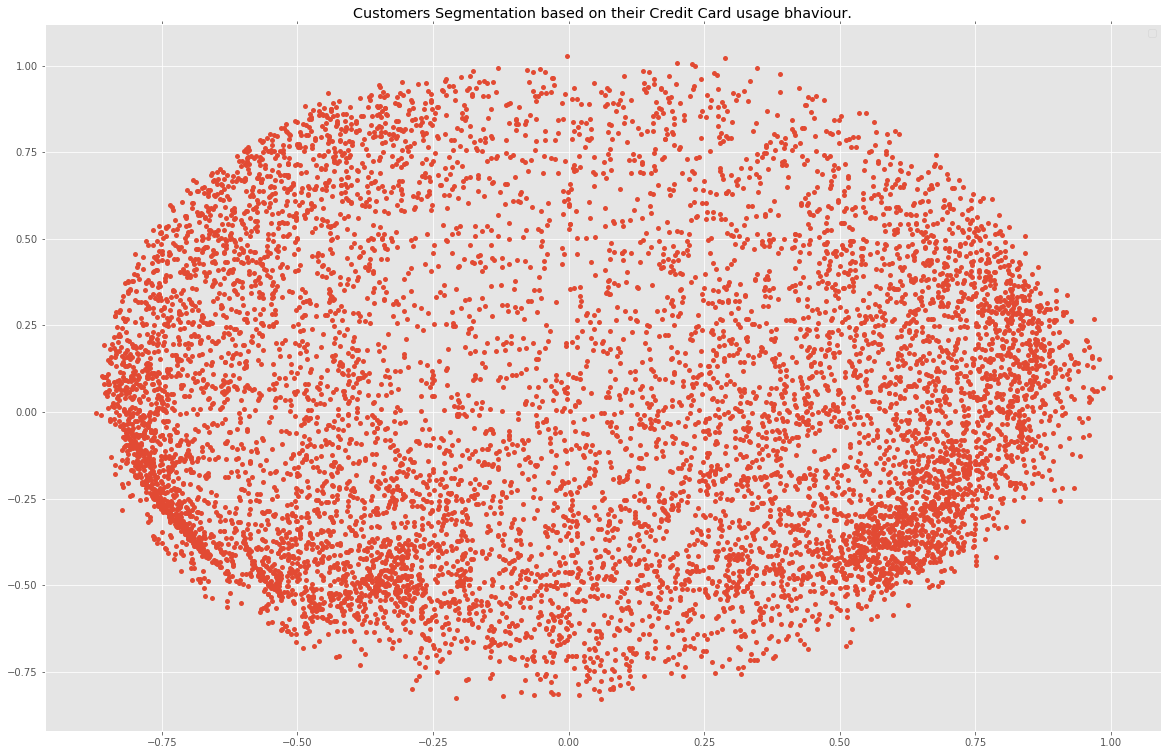

In [62]:
X_PCA = X_principal

x, y = X_PCA.iloc[:,0], X_PCA.iloc[:, 1]
  
#df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
df = pd.DataFrame({'x': x, 'y':y})

fig, ax = plt.subplots(figsize=(20, 13)) 


ax.plot(df.x, df.y, marker='o', linestyle='', ms=5, mec='none')
ax.set_aspect('auto')
ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

#### Isomap transformation

In [11]:
# ISOMAP Application
iso = manifold.Isomap(n_neighbors = 2, n_components=2)
iso.fit(normalized_df)
Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_neighbors= 2, neighbors_algorithm='auto')
T1 = iso.transform(normalized_df)


In [65]:
def Plot2D(T, title, x, y, num_to_plot=40):
    
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
#     for i in range(num_to_plot):
#         img_num = int(random.random() * num_images)
#         x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
#         x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
#         img = df.iloc[img_num,:].values.reshape(num_pixels, num_pixels)
#         ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100, extent=(x0, x1, y0, y1))
    
    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

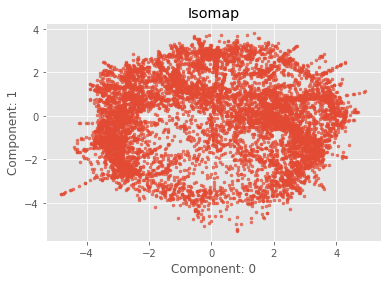

In [66]:
Plot2D(T1, 'Isomap', 0, 1, num_to_plot=40)

-----------

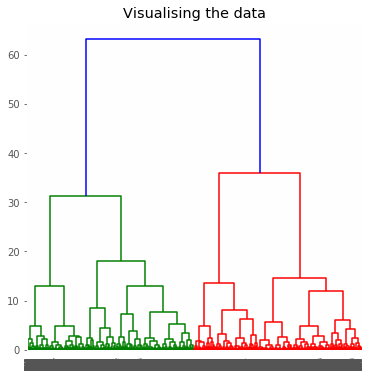

In [30]:
#Visualize the data
plt.figure(figsize =(12, 12)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

#### Silhouette

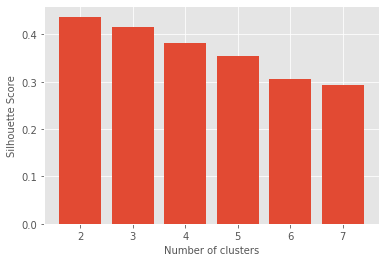

In [31]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [43]:
def kmeansSilhouette(X,range_clusters):
    for i, k in range_clusters :

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # Run the Kmeans algorithm
        km = KMeans(n_clusters=k)

        km_fit = km.fit(X)
        labels = km.predict(X)

        centroids = km.cluster_centers_


        # Get silhouette samples
        silhouette_vals = silhouette_samples(X, labels)

        # Silhouette plot
        y_ticks = []
        y_lower, y_upper = 0, 0

        for i, cluster in enumerate(np.unique(labels)):

            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()

            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)


        print("For n_clusters =", k,
                  "The average silhouette_score is :", np.mean(silhouette_vals))    


        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);


        # Scatter plot of data colored with labels
        #ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)

        ax2.scatter(X.iloc[:,0], X.iloc[:,1], marker='.', alpha=0.3) #print data
        ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250) #print centroids
        #ax2.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
        ax2.set_xlabel('C1')
        ax2.set_ylabel('C2')
        ax2.set_title('Visualization of clustered data', y=1.02)
        plt.suptitle(f'Silhouette analysis using k = {k}',
                     fontsize=16, fontweight='semibold', y=1.05);

range of clusters to evaluate:  <enumerate object at 0x149996990>
For n_clusters = 2 The average silhouette_score is : 0.44734200532397916
For n_clusters = 3 The average silhouette_score is : 0.4582564385263684
For n_clusters = 4 The average silhouette_score is : 0.4263381397704217
For n_clusters = 5 The average silhouette_score is : 0.4003999633084282
For n_clusters = 6 The average silhouette_score is : 0.3889845589170247


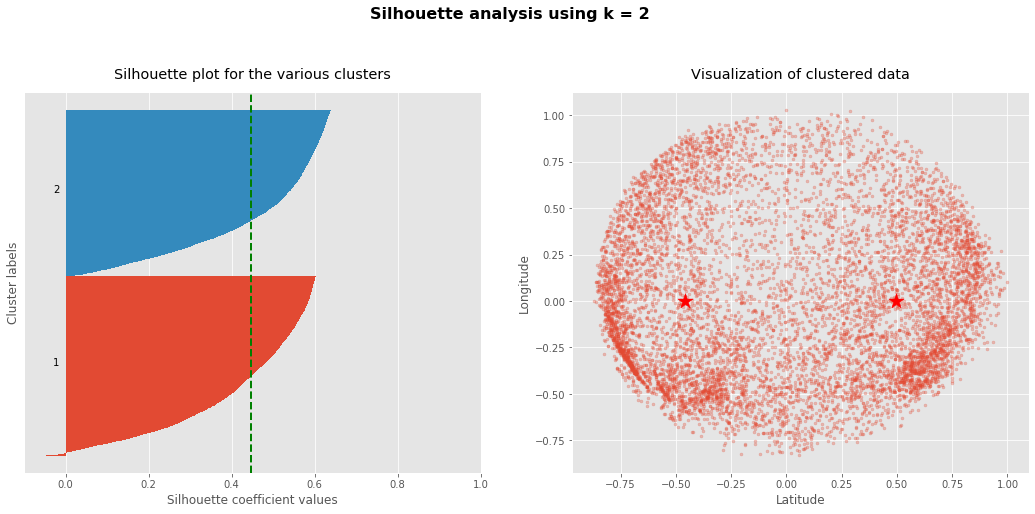

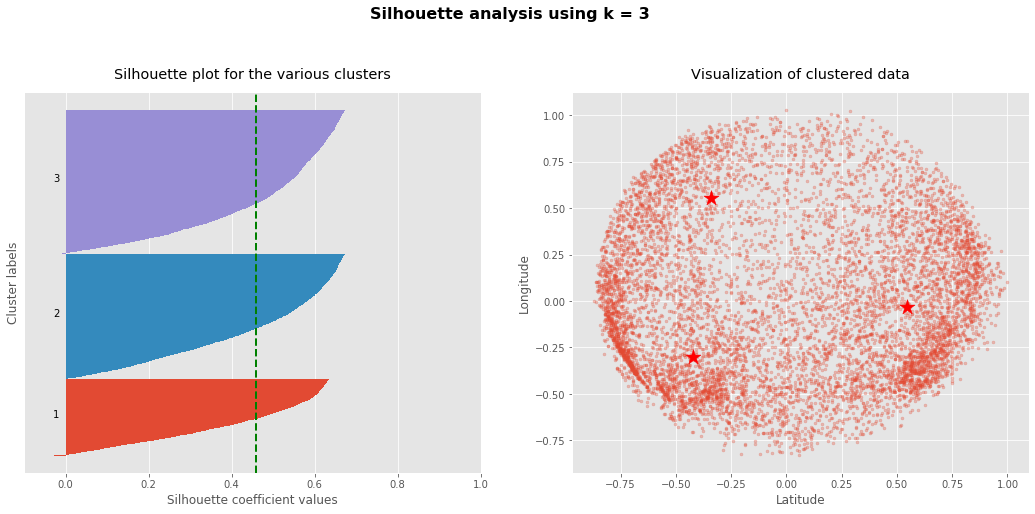

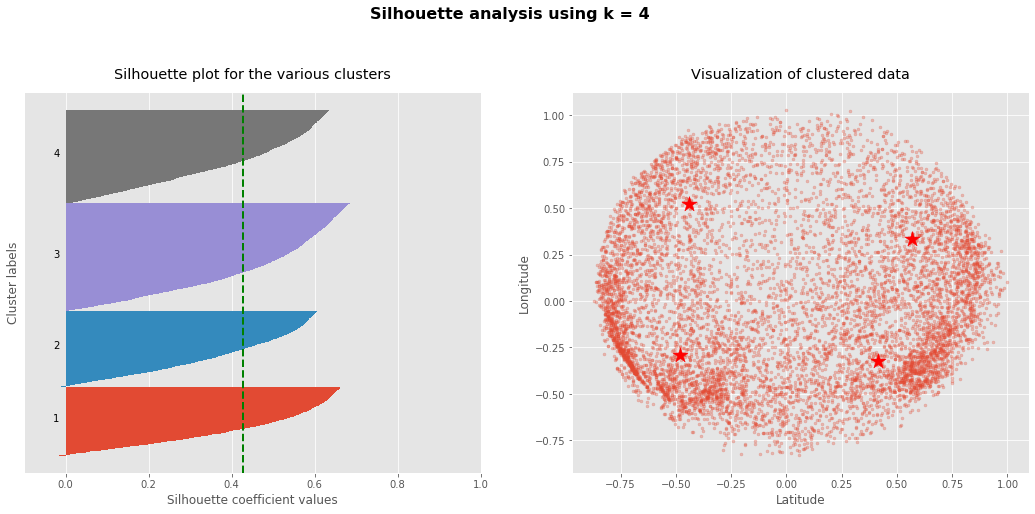

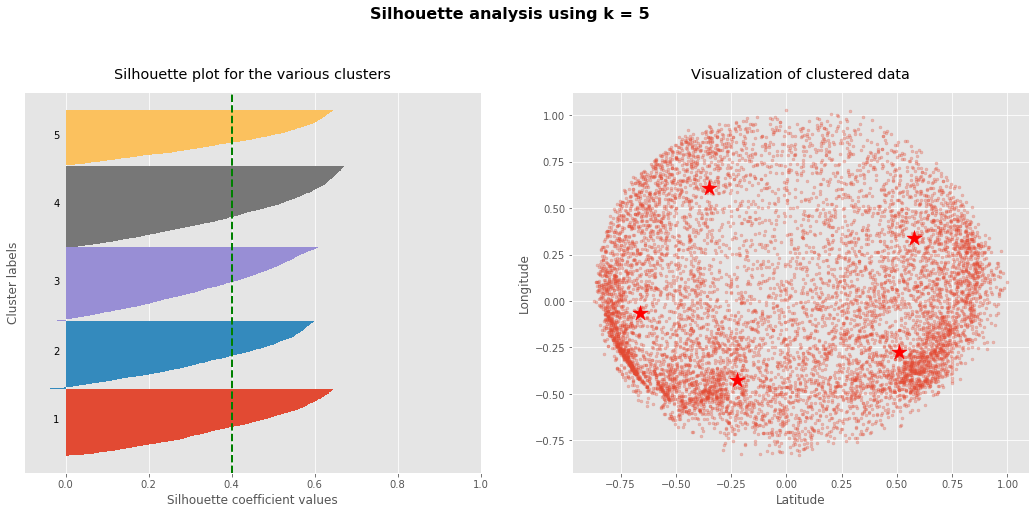

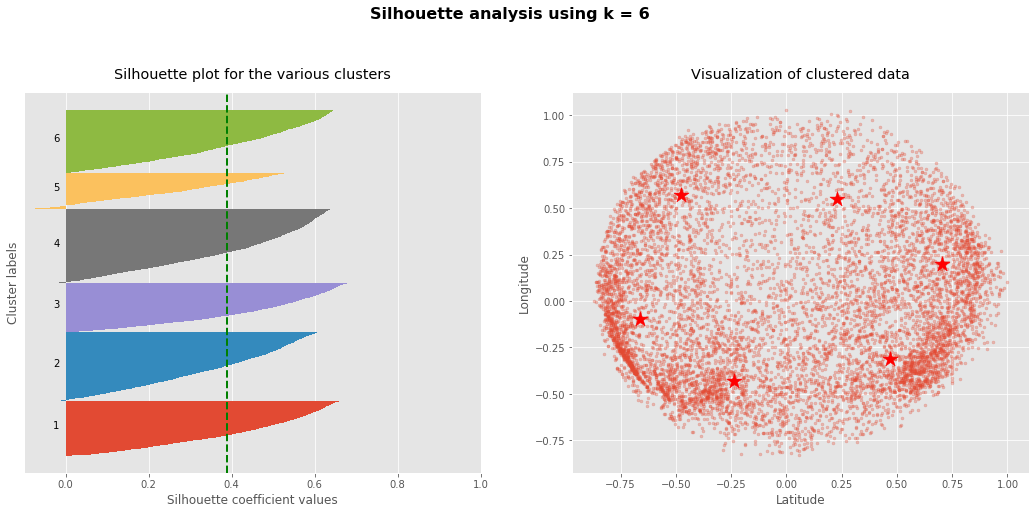

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#Define the range of the clusters
range_clusters = enumerate([2, 3, 4, 5, 6])
print("range of clusters to evaluate: ", range_clusters)

#Define a result output
tmp_sil=[]

sils = []
sils_err = []

kmeansSilhouette(X_principal,range_clusters)

#### Elbow

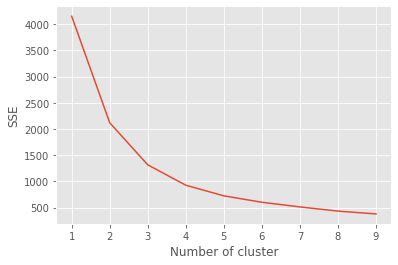

In [36]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

---------------------------

## Machine Learning Clustering Models

### Make the Hierarchical Model

In [ ]:
#Hierarchical Clustering


In [1]:
#Visualize the clustering 


#### Make the KMeans Model

In [2]:
#Kmeans model


In [3]:
# Visualizing the clustering 
